In [3]:
import os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt 
import PIL

# Model-Related
import tensorflow as tf
from tensorflow.keras import layers

# Data Preprocessing
from sklearn.model_selection import train_test_split

### Emotion Recognition in Visual Data

This module Extracts / Preprocesses & Explores data from the following datasets:
- CK+
- RAVDESS Facial Landmark Tracking
- Yale Face Database
- AffWild 2
- Microsoft FER+

It will have a Convolutional Neural Network implemented with Keras + TensorFlow back-end and trained on this data.

We will be creating testing sets of the three team members capturing themselves.


### CK+ Dataset

In [4]:
def getCK():
    ck_data = h5py.File('../Datasets/CK_data.h5', 'r')
    
    X = np.array(ck_data.get('data_pixel'))
    y = np.array(ck_data.get('data_label'))
    
    return X, y

def splitTrainValidate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)
    
    return X_train, y_train, X_test, y_test



### Image Classification with Convolutional Neural Network

- Using Keras with Tensorflow Back-end to Design, Train, Tune & Test a CNN

In [ ]:
# Get CK+ Dataset
X_CK, y_CK = getCK()

In [38]:
X_all = X_all.reshape(-1, 48, 48)

In [8]:
X_train, y_train, X_test, y_test = splitTrainValidate(X_CK, y_CK)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (882, 48, 48)
Training Labels (882,)
Validation Data:  (99, 48, 48)
Validation Labels:  (99,)


In [21]:
# # Prepare inputs.
# X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
# X_train = np.float32(X_train) / X_train.max()
# y_train = tf.keras.utils.to_categorical(y_train)

# X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
# X_test = np.float32(X_test) / X_test.max()
# y_test = tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential([

        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.Conv2D(32, kernel_size = (2, 2), activation = 'relu', strides = (1, 1), padding = "same"),
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.Conv2D(32, kernel_size = (1, 1), activation = 'relu', strides = (1, 1), padding = "same"),     
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu', strides = (1, 1), padding = "same"),    
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), activation = 'relu', strides = (1, 1), padding = "same"),    
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.1),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
    
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer = tf.optimizers.Adam(0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 164ms/step - loss: 2.1182 - accuracy: 0.2256
Epoch 2/10
7/7 [==============================] - 1s 157ms/step - loss: 1.8119 - accuracy: 0.2755
Epoch 3/10
7/7 [==============================] - 1s 158ms/step - loss: 1.7547 - accuracy: 0.3107
Epoch 4/10
7/7 [==============================] - 1s 159ms/step - loss: 1.5430 - accuracy: 0.4399
Epoch 5/10
7/7 [==============================] - 1s 161ms/step - loss: 1.3105 - accuracy: 0.5306
Epoch 6/10
7/7 [==============================] - 1s 157ms/step - loss: 1.1050 - accuracy: 0.5896
Epoch 7/10
7/7 [==============================] - 1s 159ms/step - loss: 0.9262 - accuracy: 0.6576
Epoch 8/10
7/7 [==============================] - 1s 155ms/step - loss: 1.1352 - accuracy: 0.5918
Epoch 9/10
7/7 [==============================] - 1s 158ms/step - loss: 0.8628 - accuracy: 0.6791
Epoch 10/10
7/7 [==============================] - 1s 155ms/step - loss: 0.7403 - accuracy: 0.7109


In [22]:
model.evaluate(X_test, y_test)

# Categorical Accuracy?

4/4 [==============================] - 0s 8ms/step - loss: 0.5882 - accuracy: 0.7677


[0.5882275700569153, 0.7676767706871033]

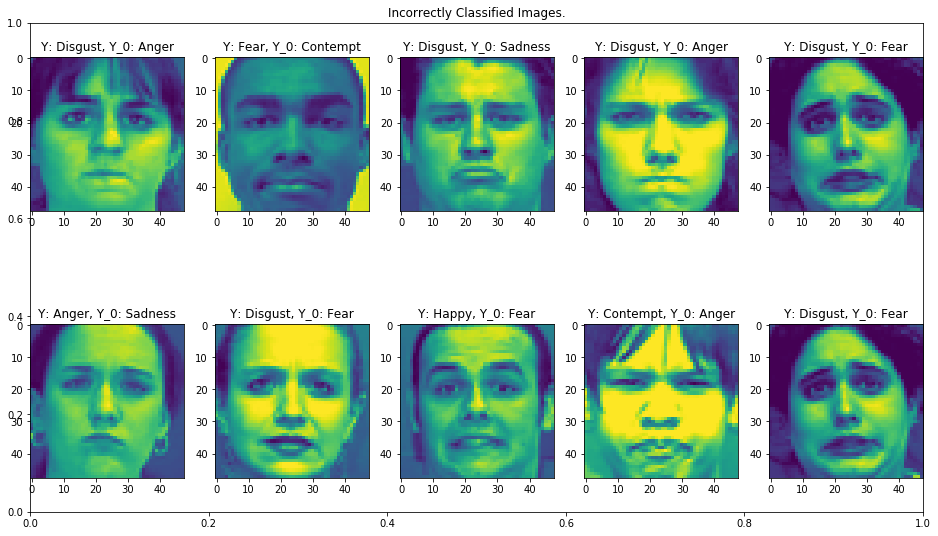

In [23]:
pred = model.predict(X_test)

emotion_labels = ['Anger','Disgust','Fear','Happy','Sadness','Surprise', 'Contempt']

figure = plt.figure(figsize = (16, 9))

i = 0
imgcount = 1
plt.title('Incorrectly Classified Images.')

while imgcount < 11:
    
    if(y_test[i].argmax() != pred[i].argmax()):
        figure.add_subplot(2, 5, imgcount)
        plt.imshow(X_test[i].reshape((48, 48)))
        imgcount += 1
        plt.title('Y: '+ emotion_labels[pred[i].argmax()] +  ', Y_0: ' + emotion_labels[y_test[i].argmax()])
        
    i += 1
    
plt.show()

### FER+ Dataset

In [9]:
from io import StringIO

def parsePixels(pixelString):
    data = pixelString.split(" ")
    
    i = 0
    for each in data:
        data[i] = np.uint8(data[i])
        i += 1    
        
    return data


def loadFER():
    fer_data = getFER()
    
    fer_training = fer_data[fer_data['Usage'] == 'Training']    
    fer_validation_private = fer_data[fer_data['Usage'] == 'PrivateTest']
    fer_validation_public = fer_data[fer_data['Usage'] == 'PublicTest']
    
    
    # Save Training Images
    for idx, each in enumerate(fer_training['pixels']):
        fer_training['pixels'].values[idx] =  np.asarray(fer_training['pixels'][idx]).reshape(48, 48)
        img = PIL.Image.fromarray(fer_training['pixels'][idx])
        img.save('../Datasets/FER2013/FER_TRAIN/' + 'fer_train_' + str(idx) + '.png')
        
    # Save Training Labels
    fer_training_y = fer_training['emotion']

    
    # Save Validation Images (Private)    
    for idx, each in enumerate(fer_validation_private['pixels']):
        fer_validation_private['pixels'].iloc[idx] = np.asarray(fer_validation_private['pixels'].iloc[idx]).reshape(48, 48)
        img = PIL.Image.fromarray(fer_validation_private['pixels'].iloc[idx])
        img.save('../Datasets/FER2013/FER_VAL_PRIVATE/' + 'fer_val_private_' + str(idx) + '.png')
        
    # Save Validation Labels (Private)    
    fer_validation_private_y = fer_validation_private['emotion']    
        
    

    # Save Validation Images (Public)
    for idx, each in enumerate(fer_validation_public['pixels']):
        fer_validation_public['pixels'].iloc[idx] = np.asarray(fer_validation_public['pixels'].iloc[idx]).reshape(48, 48)
        img = PIL.Image.fromarray(fer_validation_public['pixels'].iloc[idx])
        img.save('../Datasets/FER2013/FER_VAL_PUBLIC/' + 'fer_val_public' + str(idx) + '.png')
        
    # Save Validation Labels (Public)    
    fer_validation_public_y = fer_validation_public['emotion']    
            
    
    return fer_data



def getFER():
    fer_data = pd.read_csv('../Datasets/fer2013.csv')
    fer_data['pixels'] = fer_data['pixels'].apply(parsePixels)
    
    return fer_data
    

In [ ]:
# Get FER+ Dataset
fer_data = getFER()

In [24]:
# # Prepare inputs.
# X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
# X_train = np.float32(X_train) / X_train.max()
# y_train = tf.keras.utils.to_categorical(y_train)

# X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
# X_test = np.float32(X_test) / X_test.max()
# y_test = tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential([

        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.Conv2D(32, kernel_size = (2, 2), activation = 'relu', strides = (1, 1), padding = "same"),
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.Conv2D(32, kernel_size = (1, 1), activation = 'relu', strides = (1, 1), padding = "same"),     
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu', strides = (1, 1), padding = "same"),    
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), activation = 'relu', strides = (1, 1), padding = "same"),    
        tf.keras.layers.ZeroPadding2D((1,1)),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.1),
    
#         tf.keras.layers.Conv2D(256, kernel_size = (2, 2), activation = 'relu', strides = (1, 1), padding = 'same'),
#         tf.keras.layers.ZeroPadding2D((1,1)),
#         tf.keras.layers.Conv2D(256, kernel_size = (1, 1), activation = 'relu', strides = (1, 1), padding = 'same'),
#         tf.keras.layers.ZeroPadding2D((1,1)),
#         tf.keras.layers.Conv2D(256, kernel_size = (1, 1), activation = 'relu', strides = (1, 1), padding = 'same'),
#         tf.keras.layers.ZeroPadding2D((1,1)),
#         tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),    
#         tf.keras.layers.Dropout(0.1),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
    
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer = tf.optimizers.Adam(0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 163ms/step - loss: 2.0134 - accuracy: 0.1893
Epoch 2/10
5/7 [====================>.........] - ETA: 0s - loss: 1.8386 - accuracy: 0.2547

KeyboardInterrupt: 